### Predicting the Percentage of Students Based on Study Hours.

#### By-Osasona Ifeoluwa

### Simple Linear Regression

In [43]:
### Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Import Data

data = pd.read_csv("C:\\Users\\user\\Desktop\\TSF\\student_scores.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.duplicated().any()

False

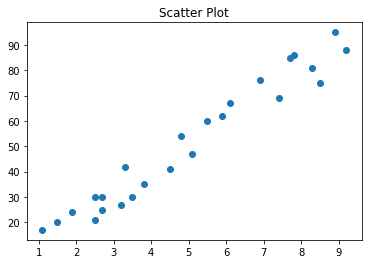

In [16]:
X =data[['Hours']]
y = data[['Scores']]
plt.scatter(X, y, marker='o')
plt.title('Scatter Plot')
plt.show()

#### The Scatter plot shows a positive Linear Relationship between the two variables

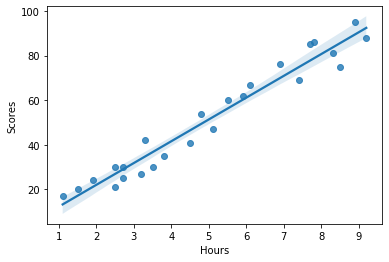

In [17]:
## Plot regression line

sns.regplot(X, y, data=data)

In [31]:
### Train the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
lr = LinearRegression()

In [35]:
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
### Test the model

predictions = lr.predict(X_test)
predictions

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [42]:
### Compare the Actual and the Predicted variable

compare = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
compare

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [45]:
### Model Accuracy

MSE = metrics.mean_squared_error(y_test,predictions)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print ("The root mean squared error is {}".format(round(RMSE,2)))
print ("The training score is {}".format(lr.score(X_train,y_train)))
print ("The test score is {}".format(lr.score(X_test,y_test)))

The root mean squared error is 4.65
The training score is 0.9515510725211552
The test score is 0.9454906892105356


In [50]:
### Predict score for a study time of 9.25hr/day

Hours=[[9.25]]
new_pred=lr.predict(Hours)
print ("The predicted score is {} for 9.25 hours/day".format((round(new_pred[0],2))))

The predicted score is 93.69 for 9.25 hours/day
